## Lab 2: Thermal Radiation & the Statistics of Noise
### Ayush Pandhi (1003227457)
### November 14, 2018

________________________________________________________________________________________________________________________________

### Setup and Data Manipulation 
________________________________________________________________________________________________________________________________

In [43]:
#Importing required modules
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2

In [44]:
#Loading data from all different sources
room_data_full = np.fromfile('room_UHF_100m.dat',dtype='int16')-2.**11

#Removing the first 50M data points which are warm up time
room_data = room_data_full[50000000:]

In [45]:
#Basic analysis on data
room_mean = np.mean(room_data)
room_median = np.median(room_data)
room_std = np.std(room_data)
room_var = np.var(room_data)
print('room_data properties: ', room_mean, room_median, room_std, room_var)

room_data properties:  -5.77591416 -6.0 30.518472644880372 931.3771725763115


In [46]:
#Adjusting data to be centered around 0
room_data_fix = room_data - room_mean

#Same analysis on adjusted data
room_fix_mean = np.mean(room_data_fix)
room_fix_median = np.median(room_data_fix)
room_fix_std = np.std(room_data_fix)
room_fix_var = np.var(room_data_fix)
print(room_fix_mean, room_fix_median, room_fix_std, room_fix_var)

5.468377821671311e-15 -0.22408583999999987 30.518472644880372 931.3771725763115


________________________________________________________________________________________________________________________________

### Scatter Plots
________________________________________________________________________________________________________________________________

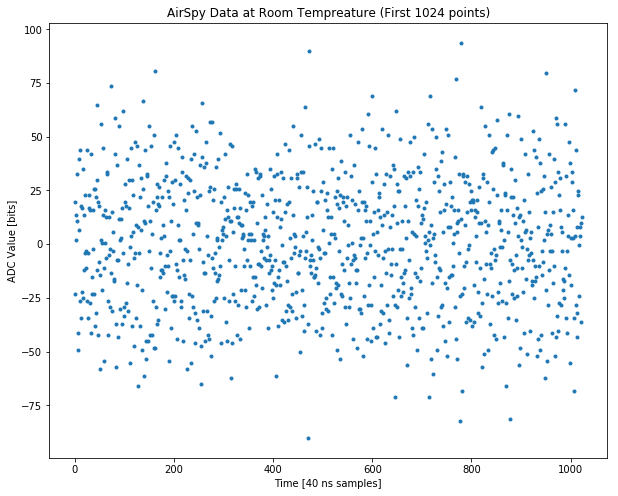

In [47]:
#Scatter plot of a small section of 1000 points
plt.figure(figsize = (10, 8))
plt.plot(room_data_fix[:1024], '.')
plt.title('AirSpy Data at Room Tempreature (First 1024 points)')
plt.xlabel('Time [40 ns samples]')
plt.ylabel('ADC Value [bits]')
plt.show()

________________________________________________________________________________________________________________________________

### Histograms
________________________________________________________________________________________________________________________________

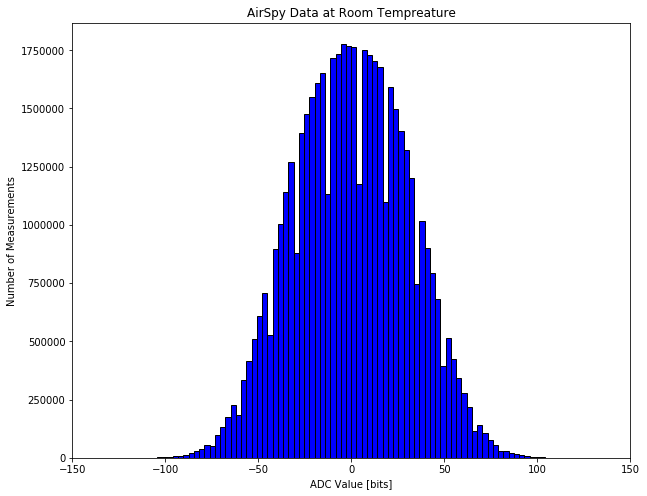

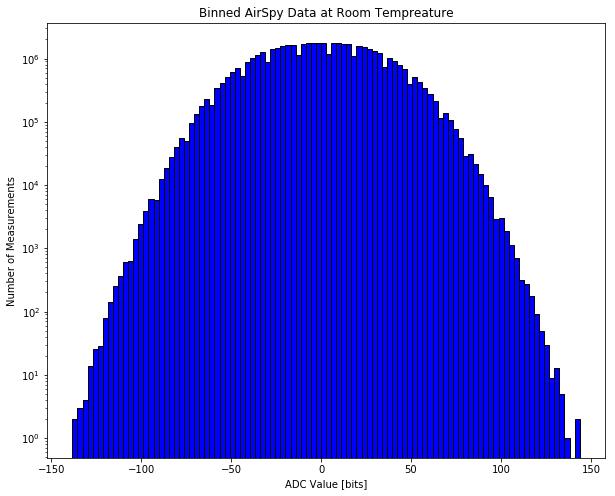

In [48]:
#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(room_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('AirSpy Data at Room Tempreature')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.xlim(-150, 150)
plt.show()


#Same plot with a log-y axis
plt.figure(figsize = (10, 8))
plt.hist(room_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data at Room Tempreature')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.show()

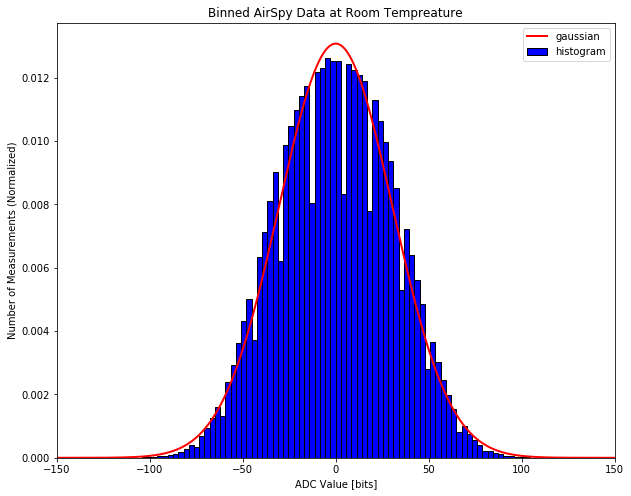

In [49]:
#Making sure it matches a Gaussian by overplotting
xlin = np.linspace(-150, 150, 1000)
gaussian_room = norm.pdf(xlin, 0, room_fix_std)

plt.figure(figsize = (10, 8))
plt.hist(room_data_fix, bins = 100, normed=1, color='b', edgecolor='k', label='histogram')
plt.plot(xlin, gaussian_room, 'r-', linewidth=2, label='gaussian')
plt.title('Binned AirSpy Data at Room Tempreature')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements (Normalized)')
plt.xlim(-150, 150)
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________

### Chi Squared Distributions
________________________________________________________________________________________________________________________________

In [50]:
#Computing power per time measurement
power_room = (1/2)*((8.85418782*(10**(-12)))*(3*(10**8))*(room_data_fix**2))

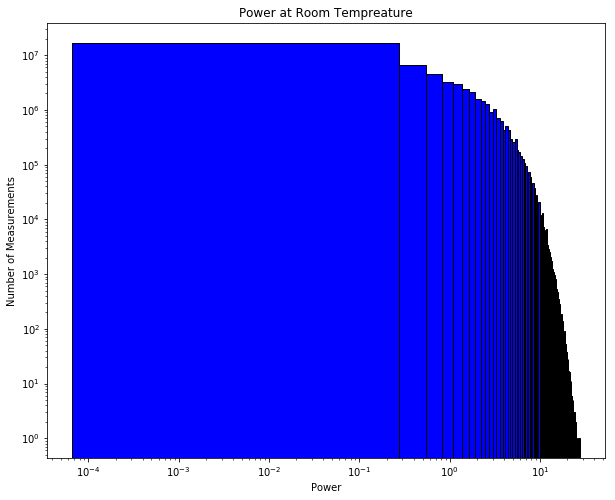

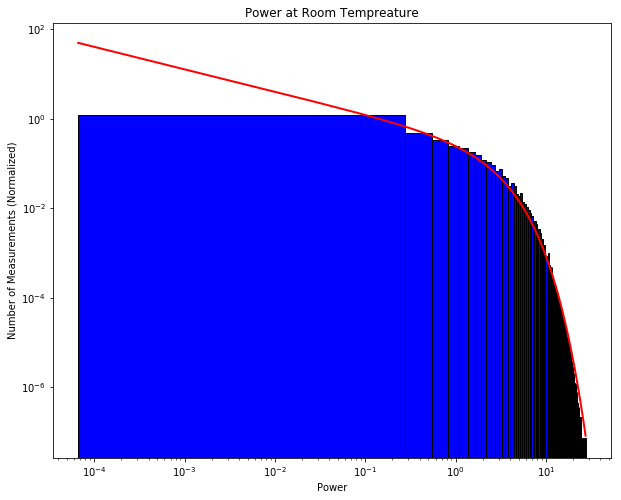

In [51]:
#Setting up chi2
xlin = np.linspace(min(power_room), max(power_room), 1000)
chi2_room = chi2.pdf(xlin, 1)

#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(power_room, bins = 100, color='b', edgecolor='k', label='histogram')
plt.title('Power at Room Tempreature')
plt.xlabel('Power')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.xscale('log')
plt.show()

#Overplot with chi2 to show it fits well
plt.figure(figsize = (10, 8))
plt.hist(power_room, bins = 100, color='b', edgecolor='k', normed=1, label='histogram')
plt.plot(xlin, chi2_room, 'r-', linewidth=2, label='chi2')
plt.title('Power at Room Tempreature')
plt.xlabel('Power')
plt.ylabel('Number of Measurements (Normalized)')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [52]:
#Defining a function to sum N adjacent samples
def sum_adj_samples(N, data):
    new_data = np.empty(int(data.shape[0]/N))
    for i in range(int(data.shape[0]/N)):
        new_data[i] = np.sum(data[i*N:(i*N)+N])
    return new_data

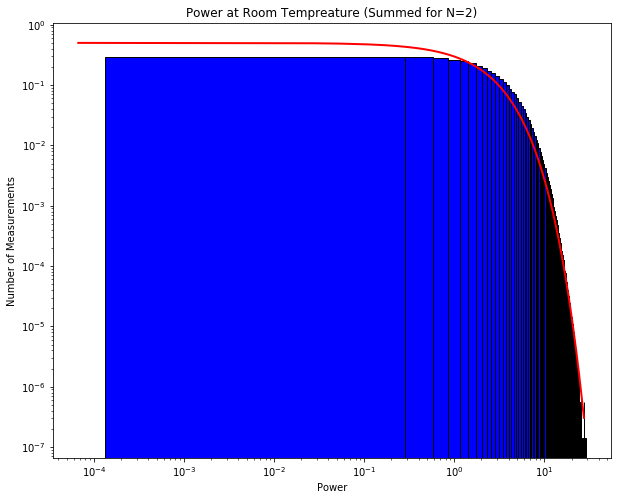

In [53]:
#Summing 2 adjacent samples
power_room2 = sum_adj_samples(2, power_room)

#Setting up chi2
xlin2 = np.linspace(min(power_room2), max(power_room2), 1000)
chi2_room2 = chi2.pdf(xlin2, 2)

#Overplot with chi2 to show it fits well
plt.figure(figsize = (10, 8))
plt.hist(power_room2, bins = 100, color='b', normed=1, edgecolor='k', label='histogram')
plt.plot(xlin, chi2_room2, 'r-', linewidth=2, label='chi2')
plt.title('Power at Room Tempreature (Summed for N=2)')
plt.xlabel('Power')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.xscale('log')
plt.show()

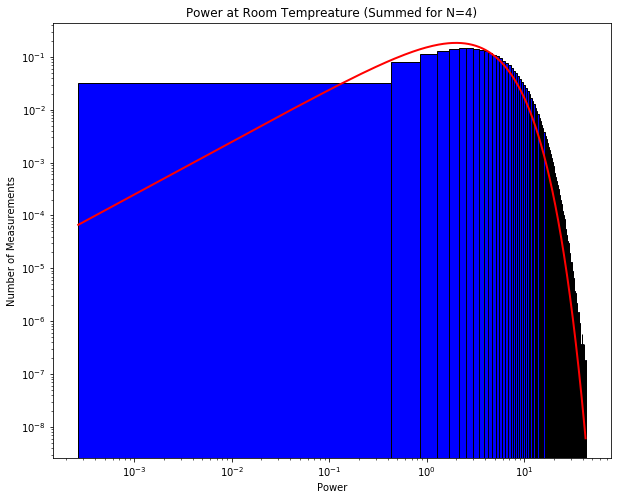

In [54]:
#Summing 4 adjacent samples
power_room4 = sum_adj_samples(4, power_room)

#Setting up chi2
xlin4 = np.linspace(min(power_room4), max(power_room4), 1000)
chi2_room4 = chi2.pdf(xlin4, 4)

#Overplot with chi2 to show it fits well
plt.figure(figsize = (10, 8))
plt.hist(power_room4, bins = 100, color='b', normed=1, edgecolor='k', label='histogram')
plt.plot(xlin4, chi2_room4, 'r-', linewidth=2, label='chi2')
plt.title('Power at Room Tempreature (Summed for N=4)')
plt.xlabel('Power')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.xscale('log')
plt.show()

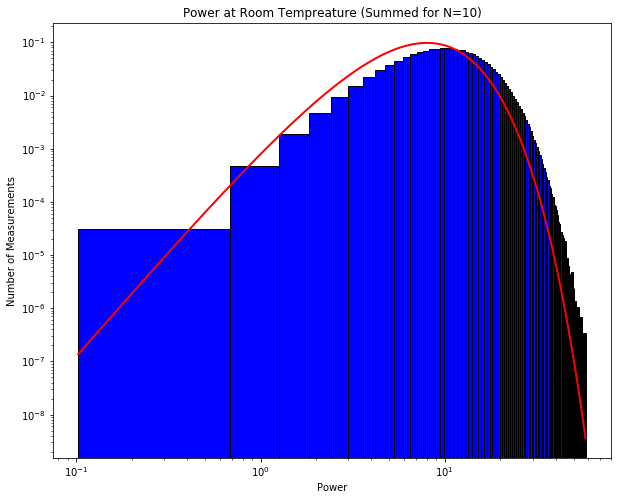

In [55]:
#Summing 10 adjacent samples
power_room10 = sum_adj_samples(10, power_room)

#Setting up chi2
xlin10 = np.linspace(min(power_room10), max(power_room10), 1000)
chi2_room10 = chi2.pdf(xlin10, 10)

#Overplot with chi2 to show it fits well
plt.figure(figsize = (10, 8))
plt.hist(power_room10, bins = 100, color='b', normed=1, edgecolor='k', label='histogram')
plt.plot(xlin10, chi2_room10, 'r-', linewidth=2, label='chi2')
plt.title('Power at Room Tempreature (Summed for N=10)')
plt.xlabel('Power')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.xscale('log')
plt.show()

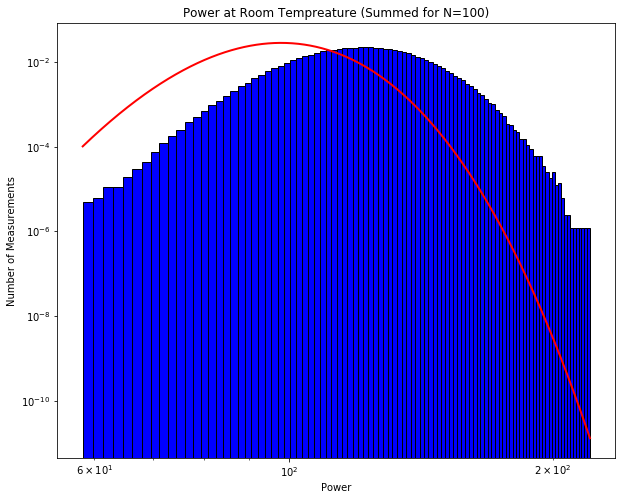

In [56]:
#Summing 100 adjacent samples
power_room100 = sum_adj_samples(100, power_room)

#Setting up chi2
xlin100 = np.linspace(min(power_room100), max(power_room100), 1000)
chi2_room100 = chi2.pdf(xlin100, 100)

#Overplot with chi2 to show it fits well
plt.figure(figsize = (10, 8))
plt.hist(power_room100, bins = 100, color='b', normed=1, edgecolor='k', label='histogram')
plt.plot(xlin100, chi2_room100, 'r-', linewidth=2, label='chi2')
plt.title('Power at Room Tempreature (Summed for N=100)')
plt.xlabel('Power')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.xscale('log')
plt.show()

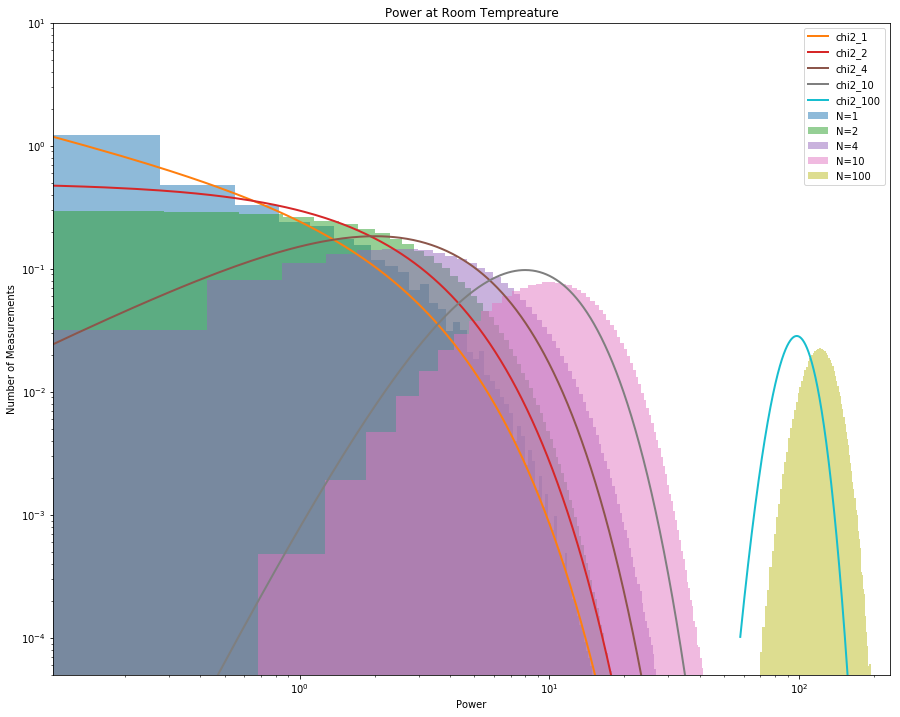

In [57]:
#Overplot with chi2 to show it fits well
plt.figure(figsize = (15, 12))
plt.hist(power_room, bins = 100, normed=1, label='N=1', alpha=0.5)
plt.plot(xlin, chi2_room, linewidth=2, label='chi2_1')
plt.hist(power_room2, bins = 100, normed=1, label='N=2', alpha=0.5)
plt.plot(xlin, chi2_room2, linewidth=2, label='chi2_2')
plt.hist(power_room4, bins = 100, normed=1, label='N=4', alpha=0.5)
plt.plot(xlin4, chi2_room4, linewidth=2, label='chi2_4')
plt.hist(power_room10, bins = 100, normed=1, label='N=10', alpha=0.5)
plt.plot(xlin10, chi2_room10, linewidth=2, label='chi2_10')
plt.hist(power_room100, bins = 100, normed=1, label='N=100', alpha=0.5)
plt.plot(xlin100, chi2_room100, linewidth=2, label='chi2_100')
plt.title('Power at Room Tempreature')
plt.xlabel('Power')
plt.ylabel('Number of Measurements')
plt.xlim(min(power_room10),)
plt.ylim(0.00005, 10)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________

### Temperature Analysis
________________________________________________________________________________________________________________________________

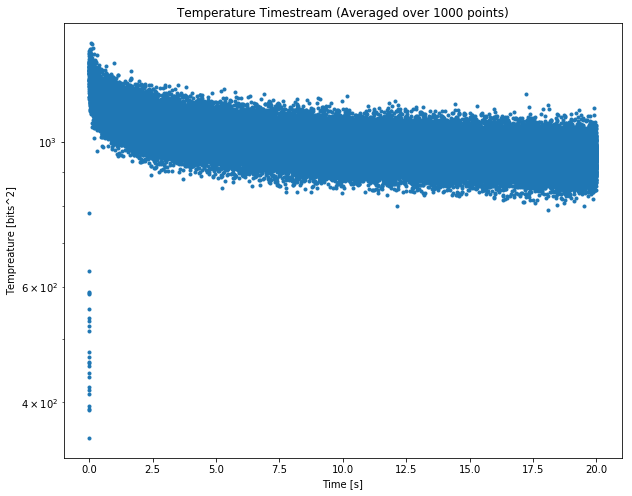

In [58]:
#Getting tempreature as average over 1000 samples of E-filed squared
tlin = np.linspace(0, 20, 100000)
temp_room1000 = (sum_adj_samples(1000, room_data_full**2))/1000

#Scatter plot of a small section of 1000 points
plt.figure(figsize = (10, 8))
plt.plot(tlin, temp_room1000, '.')
plt.title('Temperature Timestream (Averaged over 1000 points)')
plt.xlabel('Time [s]')
plt.ylabel('Tempreature [bits^2]')
plt.yscale('log')
plt.show()

In [59]:
#Analysis on tempreature
temp_room_mean = np.mean(temp_room1000)
temp_room_std = np.std(temp_room1000)
delv_room = 1/(2*20)
radiometer_room = 1/((20*delv_room)**0.5)
print('Mean Temperature: ', temp_room_mean)
print ('Standard Deviation in Temperature: ', temp_room_std)
print('Sample rate was 5M points/second so time per sample is 2e-7 seconds for a total time of 20 seconds')
print('Since we average over 1000 samples for each temp point, each point represents 2e-4 seconds')
print('Bandwidth covered (delv): ', delv_room)
print('According to the radiometer equation: ', radiometer_room)

Mean Temperature:  1002.0566152800001
Standard Deviation in Temperature:  70.58651339844455
Sample rate was 5M points/second so time per sample is 2e-7 seconds for a total time of 20 seconds
Since we average over 1000 samples for each temp point, each point represents 2e-4 seconds
Bandwidth covered (delv):  0.025
According to the radiometer equation:  1.414213562373095


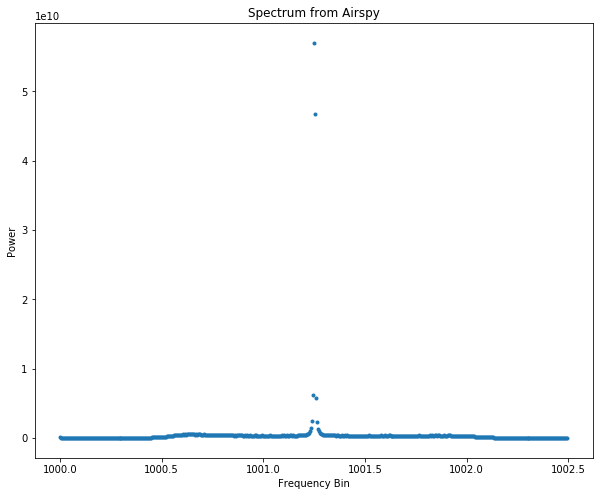

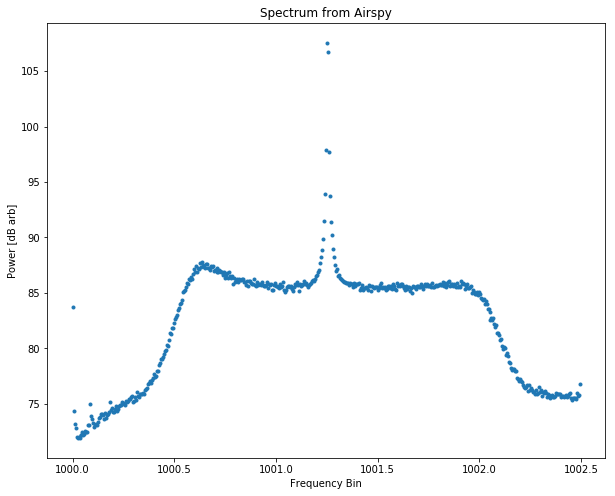

In [60]:
#Fourier transform on the room data
f = np.fft.fft(room_data_fix[0:2**19].reshape(-1, 1024), axis=1)
s = (f.real**2 + f.imag**2).sum(axis=0)
freq = 1000 + np.arange(0, 2.5, 2.5/512) #Adding the LO frequency back in to calibrate the frequency axis

#Plotting Spectrum from Airspy
plt.figure(figsize=(10,8))
plt.plot(freq, s[0:512], '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power')
plt.title('Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq, 10*np.log10(s[0:512]), '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('Spectrum from Airspy')
plt.show()

Percent Error:  4.419417382415922 %


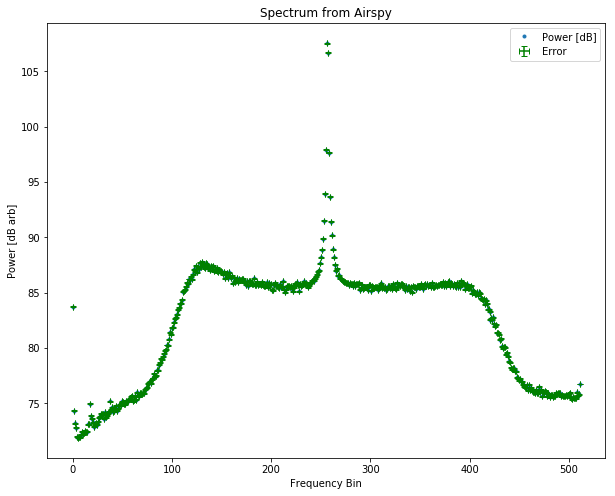

In [61]:
#Uncertainity using Radiometer equation
N = 1024
sigma = (2/N)**0.5
print('Percent Error: ', sigma*100, '%')

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(10*np.log10(s[0:512]), '.', label='Power [dB]')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('Spectrum from Airspy')
plt.errorbar(np.arange(0, 512), 10*np.log10(s[0:512]), xerr=0, yerr=sigma, linestyle='none', ecolor='g', label='Error', capsize=3)
plt.legend()
plt.show()

Percent Error:  1.0 %


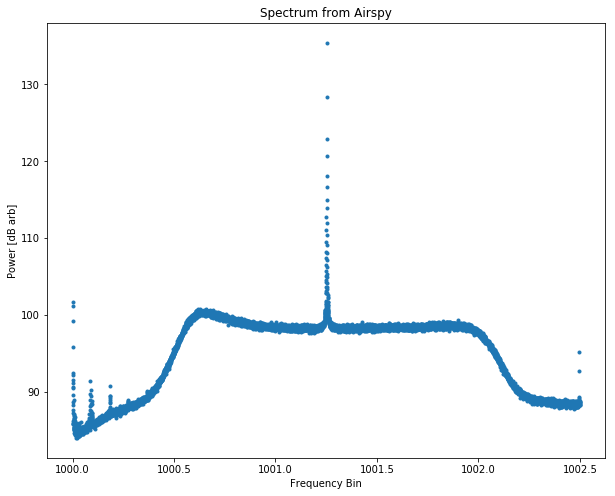

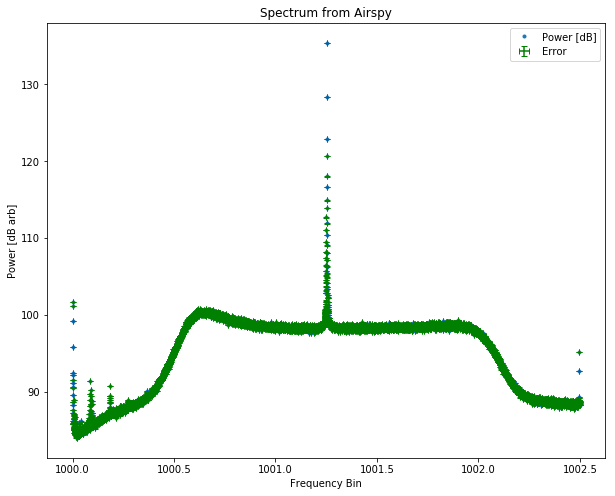

In [62]:
#Need average over 20 000 samples to get 1% uncertainty
#Fourier transform on the room data
f2 = np.fft.fft(room_data_fix[0:10240000].reshape(-1, 20000), axis=1)
s2 = (f2.real**2 + f2.imag**2).sum(axis=0)
freq2 = 1000 + np.arange(0, 2.5, 2.5/10000) #Adding the LO frequency back in to calibrate the frequency axis

#Uncertainity using Radiometer equation
N2 = 20000
sigma2 = (2/N2)**0.5
print('Percent Error: ', sigma2*100, '%')

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(s2[0:10000]), '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(s2[0:10000]), '.', label='Power [dB]')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('Spectrum from Airspy')
plt.errorbar(freq2, 10*np.log10(s2[0:10000]), xerr=0, yerr=sigma2, linestyle='none', ecolor='g', label='Error', capsize=3)
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________

### Same Analysis for FM band at Room Temp
________________________________________________________________________________________________________________________________

In [63]:
#Same analysis for FM room data
roomFM_data_full = np.fromfile('room_FM_100m.dat',dtype='int16')-2.**11
roomFM_data = roomFM_data_full[50000000:]

#Basic analysis on data
roomFM_mean = np.mean(roomFM_data)
roomFM_median = np.median(roomFM_data)
roomFM_std = np.std(roomFM_data)
roomFM_var = np.var(roomFM_data)
print('roomFM_data properties: ', roomFM_mean, roomFM_median, roomFM_std, roomFM_var)

#Adjusting data to be centered around 0
roomFM_data_fix = roomFM_data - roomFM_mean

#Same analysis on adjusted data
roomFM_fix_mean = np.mean(roomFM_data_fix)
roomFM_fix_median = np.median(roomFM_data_fix)
roomFM_fix_std = np.std(roomFM_data_fix)
roomFM_fix_var = np.var(roomFM_data_fix)
print(roomFM_fix_mean, roomFM_fix_median, roomFM_fix_std, roomFM_fix_var)

roomFM_data properties:  -5.7710613 -6.0 37.90250943211597 1436.6002212516403
-1.844678081397433e-15 -0.2289386999999996 37.90250943211597 1436.6002212516403


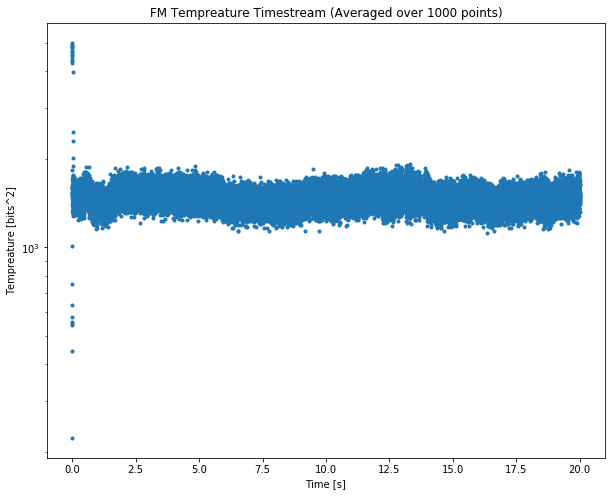

Mean Temperature:  1472.97463418
Standard Deviation in Temperature:  106.86599911832151
Sample rate was 5M points/second so time per sample is 2e-7 seconds for a total time of 20 seconds
Since we average over 1000 samples for each temp point, each point represents 2e-4 seconds
Bandwidth covered (delv):  0.025
According to the radiometer equation:  1.414213562373095


In [64]:
#Computing power per time measurement
powerFM_room = (1/2)*((8.85418782*(10**(-12)))*(3*(10**8))*(roomFM_data_fix**2))

#Getting tempreature as average over 1000 samples of E-filed squared
tlin = np.linspace(0, 20, 100000)
temp_roomFM1000 = (sum_adj_samples(1000, roomFM_data_full**2))/1000

#Scatter plot of a small section of 1000 points
plt.figure(figsize = (10, 8))
plt.plot(tlin, temp_roomFM1000, '.')
plt.title('FM Tempreature Timestream (Averaged over 1000 points)')
plt.xlabel('Time [s]')
plt.ylabel('Tempreature [bits^2]')
plt.yscale('log')
plt.show()

#Analysis on tempreature
temp_roomFM_mean = np.mean(temp_roomFM1000)
temp_roomFM_std = np.std(temp_roomFM1000)
delv_roomFM = 1/(2*20)
radiometer_roomFM = 1/((20*delv_roomFM)**0.5)
print('Mean Temperature: ', temp_roomFM_mean)
print ('Standard Deviation in Temperature: ', temp_roomFM_std)
print('Sample rate was 5M points/second so time per sample is 2e-7 seconds for a total time of 20 seconds')
print('Since we average over 1000 samples for each temp point, each point represents 2e-4 seconds')
print('Bandwidth covered (delv): ', delv_roomFM)
print('According to the radiometer equation: ', radiometer_roomFM)

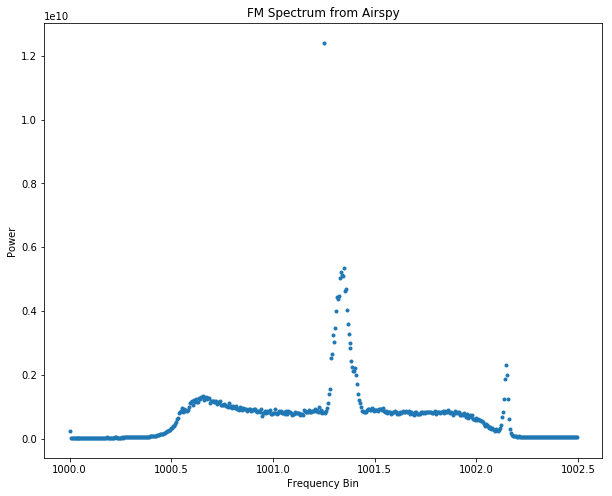

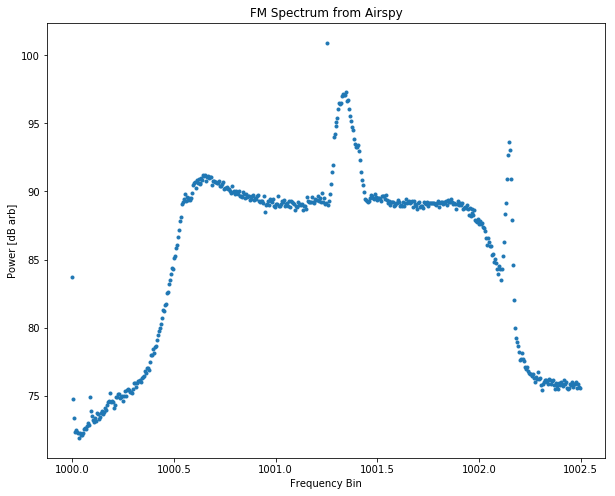

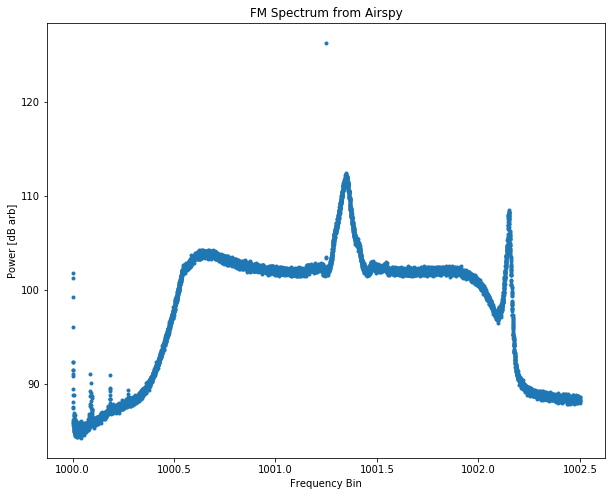

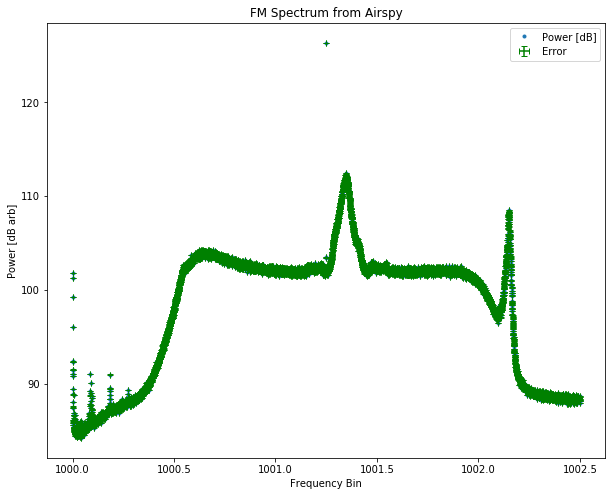

In [65]:
#Need average over 20 000 samples to get 1% uncertainty
#Fourier transform on the room data
fFM = np.fft.fft(roomFM_data_fix[0:2**19].reshape(-1, 1024), axis=1)
sFM = (fFM.real**2 + fFM.imag**2).sum(axis=0)
fFM2 = np.fft.fft(roomFM_data_fix[0:10240000].reshape(-1, 20000), axis=1)
sFM2 = (fFM2.real**2 + fFM2.imag**2).sum(axis=0)

#Plotting Spectrum from Airspy
plt.figure(figsize=(10,8))
plt.plot(freq, sFM[0:512], '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power')
plt.title('FM Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq, 10*np.log10(sFM[0:512]), '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('FM Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(sFM2[0:10000]), '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('FM Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(sFM2[0:10000]), '.', label='Power [dB]')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('FM Spectrum from Airspy')
plt.errorbar(freq2, 10*np.log10(sFM2[0:10000]), xerr=0, yerr=sigma2, linestyle='none', ecolor='g', label='Error', capsize=3)
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________

### Same Analysis for LTE band at Room Temp
________________________________________________________________________________________________________________________________

In [66]:
#Same analysis for FM room data
roomLTE_data_full = np.fromfile('room_LTE_100m.dat',dtype='int16')-2.**11
roomLTE_data = roomLTE_data_full[50000000:]

#Basic analysis on data
roomLTE_mean = np.mean(roomLTE_data)
roomLTE_median = np.median(roomLTE_data)
roomLTE_std = np.std(roomLTE_data)
roomLTE_var = np.var(roomLTE_data)
print('roomLTE_data properties: ', roomLTE_mean, roomLTE_median, roomLTE_std, roomLTE_var)

#Adjusting data to be centered around 0
roomLTE_data_fix = roomLTE_data - roomLTE_mean

#Same analysis on adjusted data
roomLTE_fix_mean = np.mean(roomLTE_data_fix)
roomLTE_fix_median = np.median(roomLTE_data_fix)
roomLTE_fix_std = np.std(roomLTE_data_fix)
roomLTE_fix_var = np.var(roomLTE_data_fix)
print(roomLTE_fix_mean, roomLTE_fix_median, roomLTE_fix_std, roomLTE_fix_var)

roomLTE_data properties:  -5.6422721 -6.0 151.7876867200024 23039.50183980959
-1.0665676200005692e-14 -0.35772790000000043 151.7876867200024 23039.50183980959


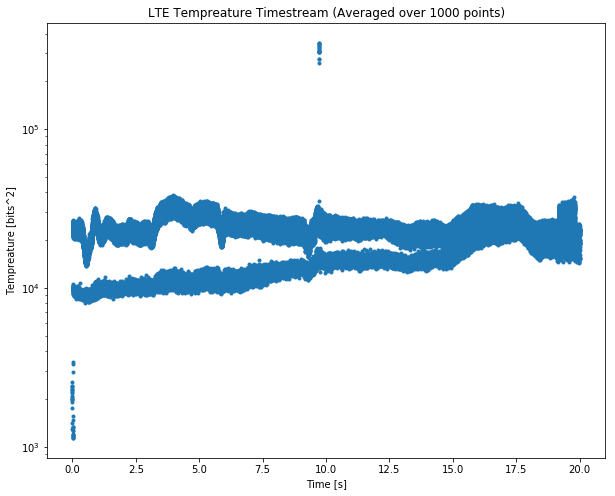

Mean Temperature:  22542.022767370003
Standard Deviation in Temperature:  6826.190436600446
Sample rate was 5M points/second so time per sample is 2e-7 seconds for a total time of 20 seconds
Since we average over 1000 samples for each temp point, each point represents 2e-4 seconds
Bandwidth covered (delv):  0.025
According to the radiometer equation:  1.414213562373095


In [67]:
#Computing power per time measurement
powerLTE_room = (1/2)*((8.85418782*(10**(-12)))*(3*(10**8))*(roomLTE_data_fix**2))

#Getting tempreature as average over 1000 samples of E-filed squared
tlin = np.linspace(0, 20, 100000)
temp_roomLTE1000 = (sum_adj_samples(1000, roomLTE_data_full**2))/1000

#Scatter plot of a small section of 1000 points
plt.figure(figsize = (10, 8))
plt.plot(tlin, temp_roomLTE1000, '.')
plt.title('LTE Tempreature Timestream (Averaged over 1000 points)')
plt.xlabel('Time [s]')
plt.ylabel('Tempreature [bits^2]')
plt.yscale('log')
plt.show()

#Analysis on tempreature
temp_roomLTE_mean = np.mean(temp_roomLTE1000)
temp_roomLTE_std = np.std(temp_roomLTE1000)
delv_roomLTE = 1/(2*20)
radiometer_roomLTE = 1/((20*delv_roomLTE)**0.5)
print('Mean Temperature: ', temp_roomLTE_mean)
print ('Standard Deviation in Temperature: ', temp_roomLTE_std)
print('Sample rate was 5M points/second so time per sample is 2e-7 seconds for a total time of 20 seconds')
print('Since we average over 1000 samples for each temp point, each point represents 2e-4 seconds')
print('Bandwidth covered (delv): ', delv_roomLTE)
print('According to the radiometer equation: ', radiometer_roomLTE)

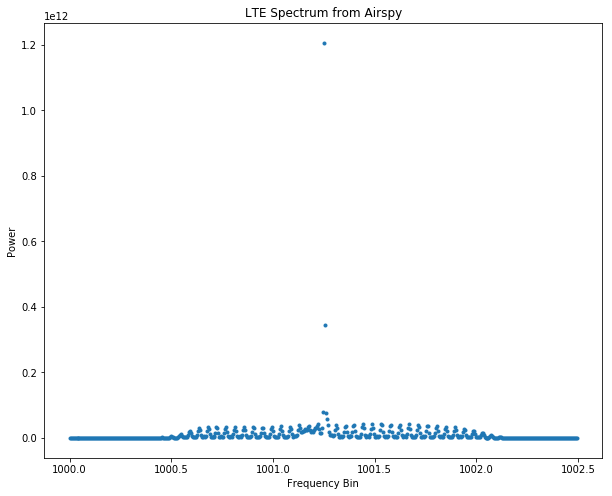

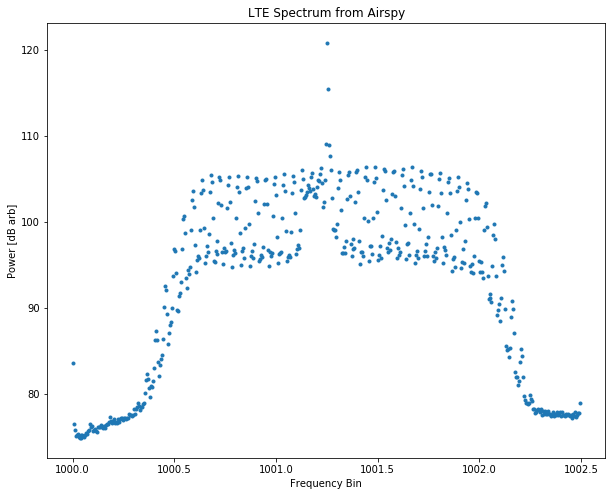

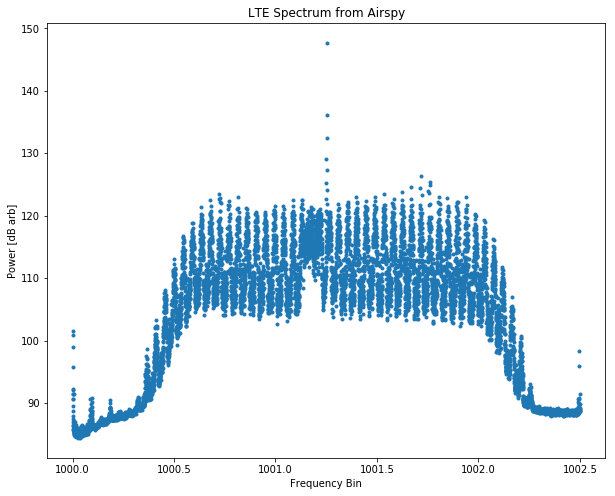

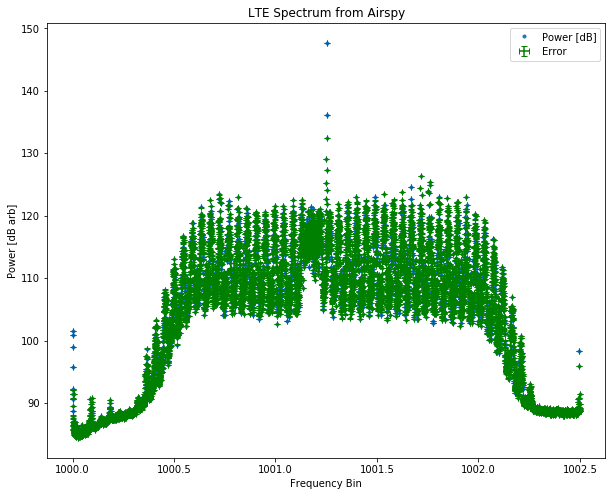

In [68]:
#Need average over 20 000 samples to get 1% uncertainty
#Fourier transform on the room data
fLTE = np.fft.fft(roomLTE_data_fix[0:2**19].reshape(-1, 1024), axis=1)
sLTE = (fLTE.real**2 + fLTE.imag**2).sum(axis=0)
fLTE2 = np.fft.fft(roomLTE_data_fix[0:10240000].reshape(-1, 20000), axis=1)
sLTE2 = (fLTE2.real**2 + fLTE2.imag**2).sum(axis=0)

#Plotting Spectrum from Airspy
plt.figure(figsize=(10,8))
plt.plot(freq, sLTE[0:512], '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power')
plt.title('LTE Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq, 10*np.log10(sLTE[0:512]), '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('LTE Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(sLTE2[0:10000]), '.')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('LTE Spectrum from Airspy')
plt.show()

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(sLTE2[0:10000]), '.', label='Power [dB]')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('LTE Spectrum from Airspy')
plt.errorbar(freq2, 10*np.log10(sLTE2[0:10000]), xerr=0, yerr=sigma2, linestyle='none', ecolor='g', label='Error', capsize=3)
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________

### Vary the Physical Tempreature of the Load
________________________________________________________________________________________________________________________________

boiling_data properties:  -5.75757528 -6.0 30.1757972583183 910.5787401751303
1.316448106081225e-16 -0.24242471999999982 30.1757972583183 910.5787401751303


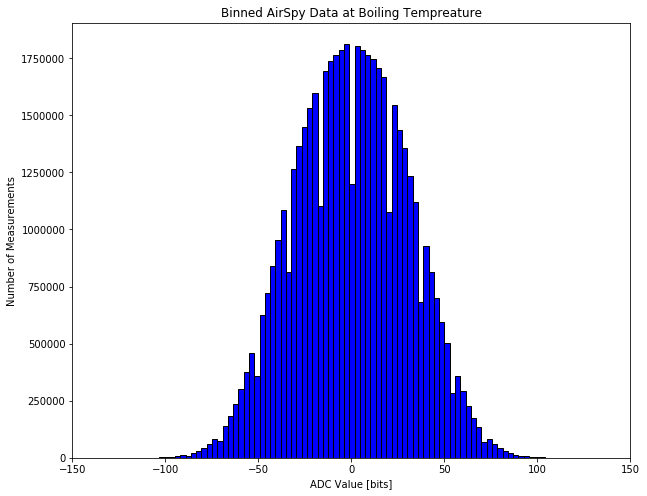

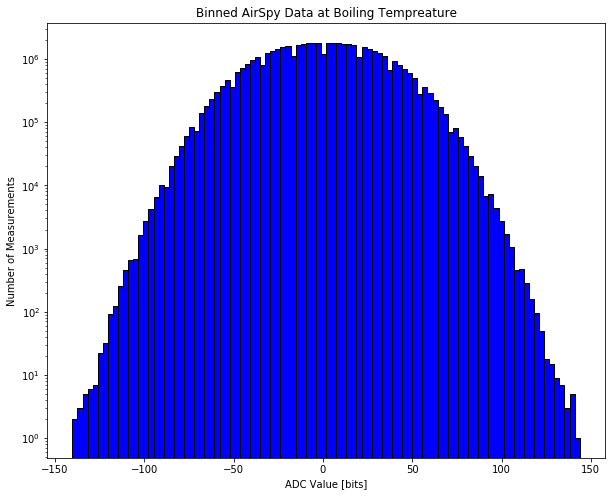

In [69]:
#Loading boiling data
boiling_data_full = np.fromfile('boiling.dat',dtype='int16')-2.**11
boiling_data = boiling_data_full[50000000:]

#Basic analysis on data
boiling_mean = np.mean(boiling_data)
boiling_median = np.median(boiling_data)
boiling_std = np.std(boiling_data)
boiling_var = np.var(boiling_data)
print('boiling_data properties: ', boiling_mean, boiling_median, boiling_std, boiling_var)

#Adjusting data to be centered around 0
boiling_data_fix = boiling_data - boiling_mean

#Same analysis on adjusted data
boiling_fix_mean = np.mean(boiling_data_fix)
boiling_fix_median = np.median(boiling_data_fix)
boiling_fix_std = np.std(boiling_data_fix)
boiling_fix_var = np.var(boiling_data_fix)
print(boiling_fix_mean, boiling_fix_median, boiling_fix_std, boiling_fix_var)

#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(boiling_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data at Boiling Tempreature')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.xlim(-150, 150)
plt.show()

#Same plot with a log-y axis
plt.figure(figsize = (10, 8))
plt.hist(boiling_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data at Boiling Tempreature')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.show()

ice_data properties:  -5.74822656 -6.0 29.984903159672044 899.0944174949105
-3.082604962401092e-15 -0.25177344 29.984903159672044 899.0944174949105


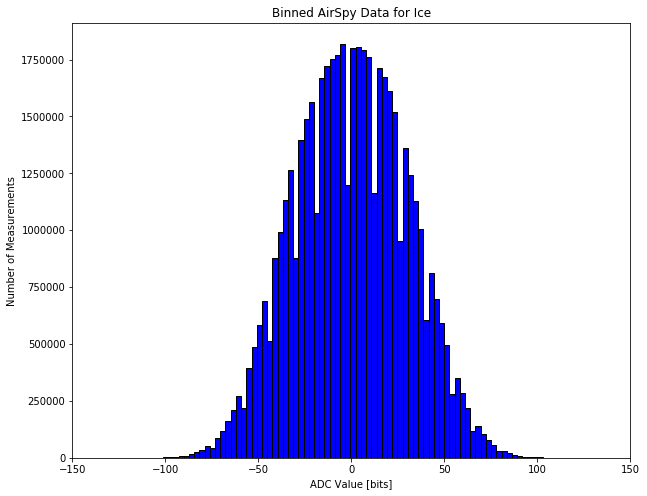

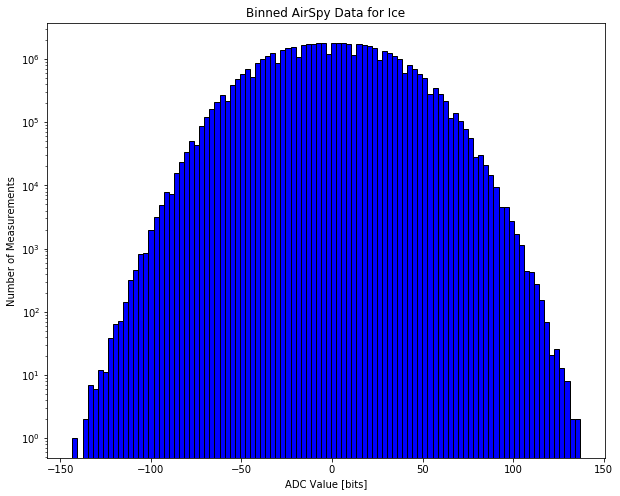

In [70]:
#Loading ice data
ice_data_full = np.fromfile('ice.dat',dtype='int16')-2.**11
ice_data = ice_data_full[50000000:]

#Basic analysis on data
ice_mean = np.mean(ice_data)
ice_median = np.median(ice_data)
ice_std = np.std(ice_data)
ice_var = np.var(ice_data)
print('ice_data properties: ', ice_mean, ice_median, ice_std, ice_var)

#Adjusting data to be centered around 0
ice_data_fix = ice_data - ice_mean

#Same analysis on adjusted data
ice_fix_mean = np.mean(ice_data_fix)
ice_fix_median = np.median(ice_data_fix)
ice_fix_std = np.std(ice_data_fix)
ice_fix_var = np.var(ice_data_fix)
print(ice_fix_mean, ice_fix_median, ice_fix_std, ice_fix_var)

#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(ice_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data for Ice')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.xlim(-150, 150)
plt.show()

#Same plot with a log-y axis
plt.figure(figsize = (10, 8))
plt.hist(ice_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data for Ice')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.show()

dryice_data properties:  -5.76639702 -6.0 32.538195906161356 1058.7341928277358
-5.707261152565479e-16 -0.23360297999999968 32.538195906161356 1058.7341928277358


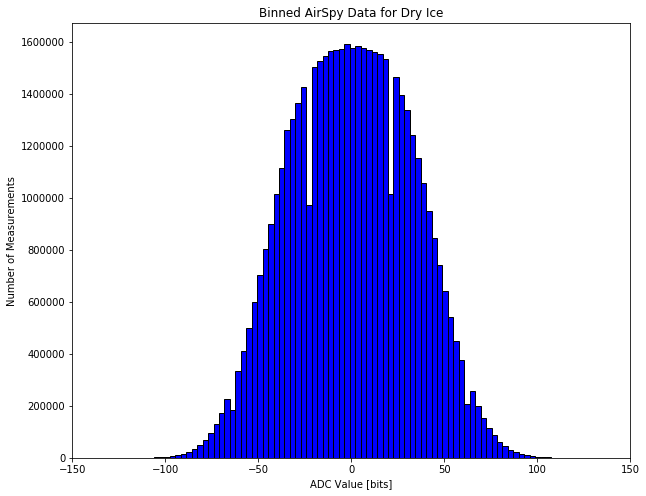

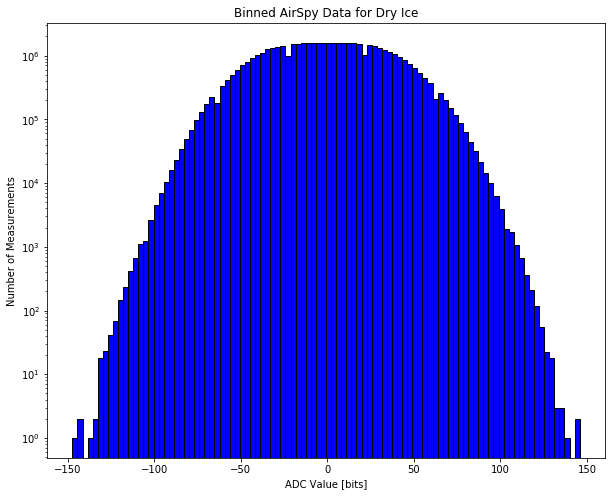

In [71]:
#Loading dry ice data
dryice_data_full = np.fromfile('dry_ice.dat',dtype='int16')-2.**11
dryice_data = dryice_data_full[50000000:]

#Basic analysis on data
dryice_mean = np.mean(dryice_data)
dryice_median = np.median(dryice_data)
dryice_std = np.std(dryice_data)
dryice_var = np.var(dryice_data)
print('dryice_data properties: ', dryice_mean, dryice_median, dryice_std, dryice_var)

#Adjusting data to be centered around 0
dryice_data_fix = dryice_data - dryice_mean

#Same analysis on adjusted data
dryice_fix_mean = np.mean(dryice_data_fix)
dryice_fix_median = np.median(dryice_data_fix)
dryice_fix_std = np.std(dryice_data_fix)
dryice_fix_var = np.var(dryice_data_fix)
print(dryice_fix_mean, dryice_fix_median, dryice_fix_std, dryice_fix_var)

#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(dryice_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data for Dry Ice')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.xlim(-150, 150)
plt.show()

#Same plot with a log-y axis
plt.figure(figsize = (10, 8))
plt.hist(dryice_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data for Dry Ice')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.show()

liqnit_data properties:  -5.66995894 -6.0 29.08417347766156 845.8891468787122
5.317879185895436e-15 -0.3300410600000001 29.08417347766156 845.8891468787122


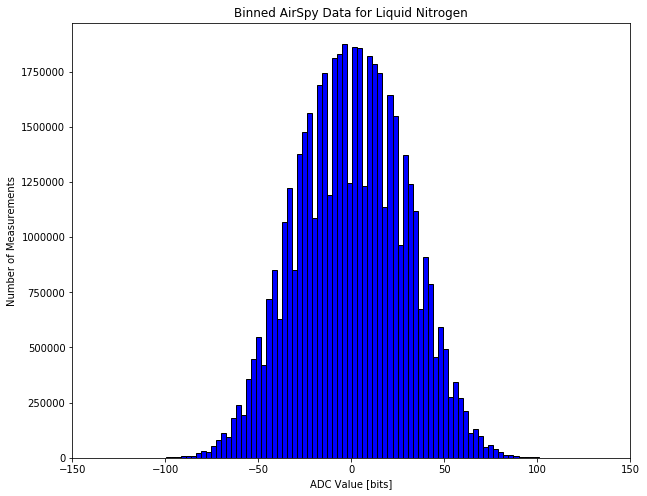

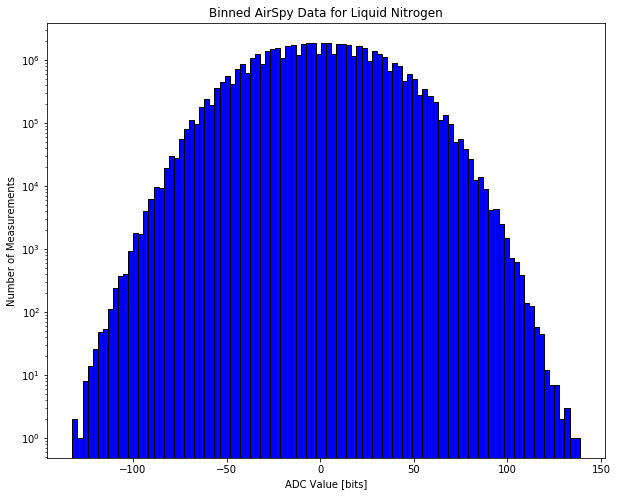

In [72]:
#Loading liquid nitrogen data
liqnit_data_full = np.fromfile('liquid_nitrogen.dat',dtype='int16')-2.**11
liqnit_data = liqnit_data_full[50000000:]

#Basic analysis on data
liqnit_mean = np.mean(liqnit_data)
liqnit_median = np.median(liqnit_data)
liqnit_std = np.std(liqnit_data)
liqnit_var = np.var(liqnit_data)
print('liqnit_data properties: ', liqnit_mean, liqnit_median, liqnit_std, liqnit_var)

#Adjusting data to be centered around 0
liqnit_data_fix = liqnit_data - liqnit_mean

#Same analysis on adjusted data
liqnit_fix_mean = np.mean(liqnit_data_fix)
liqnit_fix_median = np.median(liqnit_data_fix)
liqnit_fix_std = np.std(liqnit_data_fix)
liqnit_fix_var = np.var(liqnit_data_fix)
print(liqnit_fix_mean, liqnit_fix_median, liqnit_fix_std, liqnit_fix_var)

#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(liqnit_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data for Liquid Nitrogen')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.xlim(-150, 150)
plt.show()

#Same plot with a log-y axis
plt.figure(figsize = (10, 8))
plt.hist(liqnit_data_fix, bins = 100, color='b', edgecolor='k')
plt.title('Binned AirSpy Data for Liquid Nitrogen')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.show()

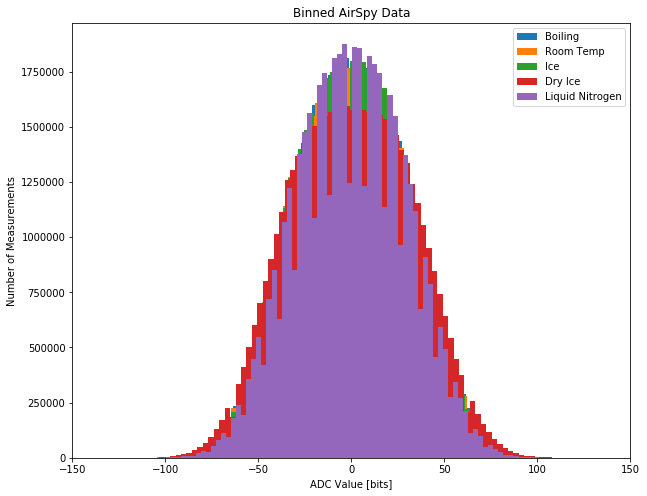

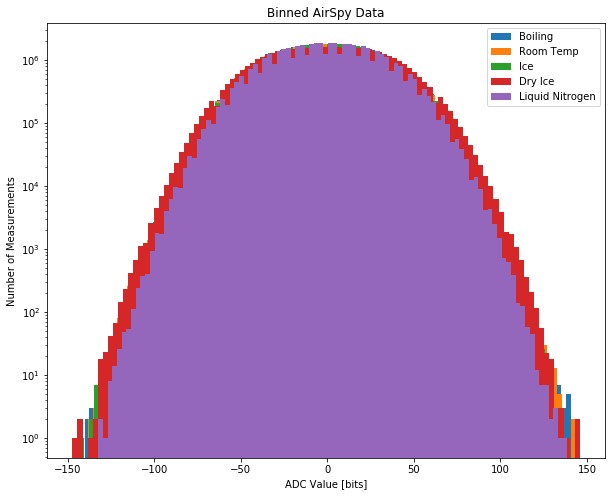

In [73]:
#Plotting the data as a histogram
plt.figure(figsize = (10, 8))
plt.hist(boiling_data_fix, bins = 100, label='Boiling')
plt.hist(room_data_fix, bins = 100, label='Room Temp')
plt.hist(ice_data_fix, bins = 100, label='Ice')
plt.hist(dryice_data_fix, bins = 100, label='Dry Ice')
plt.hist(liqnit_data_fix, bins = 100, label='Liquid Nitrogen')
plt.title('Binned AirSpy Data')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.xlim(-150, 150)
plt.legend()
plt.show()

#Same plot with a log-y axis
plt.figure(figsize = (10, 8))
plt.hist(boiling_data_fix, bins = 100, label='Boiling')
plt.hist(room_data_fix, bins = 100, label='Room Temp')
plt.hist(ice_data_fix, bins = 100, label='Ice')
plt.hist(dryice_data_fix, bins = 100, label='Dry Ice')
plt.hist(liqnit_data_fix, bins = 100, label='Liquid Nitrogen')
plt.title('Binned AirSpy Data')
plt.xlabel('ADC Value [bits]')
plt.ylabel('Number of Measurements')
plt.yscale('log')
plt.legend()
plt.show()

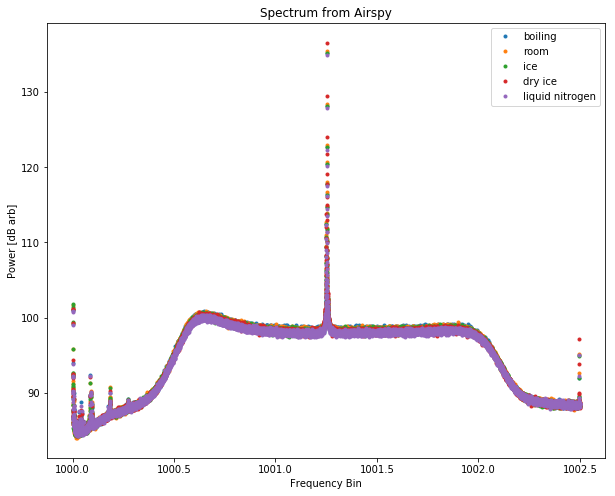

In [74]:
#Fourier transform
f = np.fft.fft(room_data_fix[0:10240000].reshape(-1, 20000), axis=1)
s = (f.real**2 + f.imag**2).sum(axis=0)
f2 = np.fft.fft(boiling_data_fix[0:10240000].reshape(-1, 20000), axis=1)
s2 = (f2.real**2 + f2.imag**2).sum(axis=0)
f3 = np.fft.fft(ice_data_fix[0:10240000].reshape(-1, 20000), axis=1)
s3 = (f3.real**2 + f3.imag**2).sum(axis=0)
f4 = np.fft.fft(dryice_data_fix[0:10240000].reshape(-1, 20000), axis=1)
s4 = (f4.real**2 + f4.imag**2).sum(axis=0)
f5 = np.fft.fft(liqnit_data_fix[0:10240000].reshape(-1, 20000), axis=1)
s5 = (f5.real**2 + f5.imag**2).sum(axis=0)

#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(s2[0:10000]), '.', label='boiling')
plt.plot(freq2, 10*np.log10(s[0:10000]), '.', label='room')
plt.plot(freq2, 10*np.log10(s3[0:10000]), '.', label='ice')
plt.plot(freq2, 10*np.log10(s4[0:10000]), '.', label='dry ice')
plt.plot(freq2, 10*np.log10(s5[0:10000]), '.', label='liquid nitrogen')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('Spectrum from Airspy')
plt.legend()
plt.show()

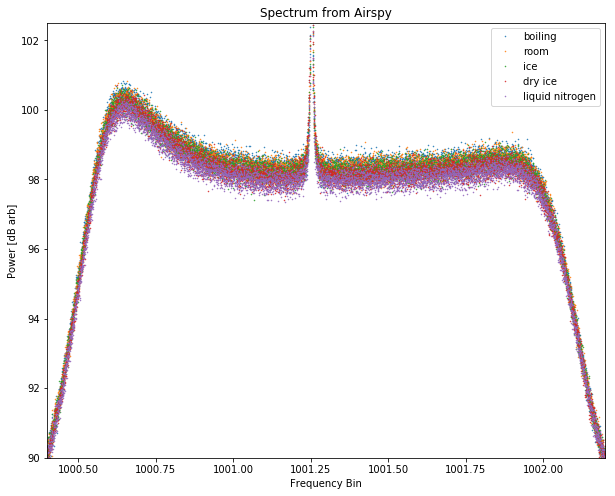

In [75]:
#Plotting Spectrum from Airspy in dB
plt.figure(figsize=(10,8))
plt.plot(freq2, 10*np.log10(s2[0:10000]), '.', markersize=1, label='boiling')
plt.plot(freq2, 10*np.log10(s[0:10000]), '.', markersize=1, label='room')
plt.plot(freq2, 10*np.log10(s3[0:10000]), '.', markersize=1, label='ice')
plt.plot(freq2, 10*np.log10(s4[0:10000]), '.', markersize=1, label='dry ice')
plt.plot(freq2, 10*np.log10(s5[0:10000]), '.', markersize=1, label='liquid nitrogen')
plt.xlabel('Frequency Bin')
plt.ylabel('Power [dB arb]')
plt.title('Spectrum from Airspy')
plt.ylim(90, 102.5)
plt.xlim(1000.4, 1002.2)
plt.legend()
plt.show()

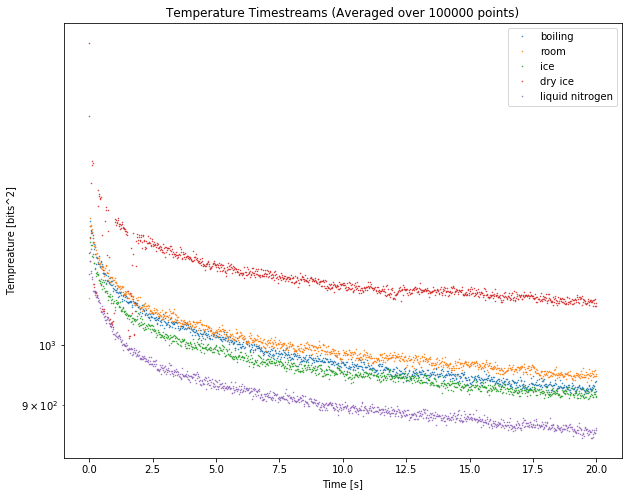

In [76]:
#Getting tempreature as average over 1000 samples of E-filed squared
tlin = np.linspace(0, 20, 1000)
temp_room100000 = (sum_adj_samples(100000, room_data_full**2))/100000
temp_boiling100000 = (sum_adj_samples(100000, boiling_data_full**2))/100000
temp_ice100000 = (sum_adj_samples(100000, ice_data_full**2))/100000
temp_dryice100000 = (sum_adj_samples(100000, dryice_data_full**2))/100000
temp_liqnit100000 = (sum_adj_samples(100000, liqnit_data_full**2))/100000

#Scatter plot of a small section of 1000 points
plt.figure(figsize = (10, 8))
plt.plot(tlin, temp_boiling100000, '.', markersize=1, label='boiling')
plt.plot(tlin, temp_room100000, '.', markersize=1, label='room')
plt.plot(tlin, temp_ice100000, '.', markersize=1, label='ice')
plt.plot(tlin, temp_dryice100000, '.', markersize=1, label='dry ice')
plt.plot(tlin, temp_liqnit100000, '.', markersize=1, label='liquid nitrogen')
plt.title('Temperature Timestreams (Averaged over 100000 points)')
plt.xlabel('Time [s]')
plt.ylabel('Tempreature [bits^2]')
plt.yscale('log')
plt.legend()
plt.show()

In [83]:
variances = np.array((boiling_var, room_var, ice_var, dryice_var, liqnit_var))
temperatures = np.array((87, 22, 0, -79, -196))

(0, 1400)

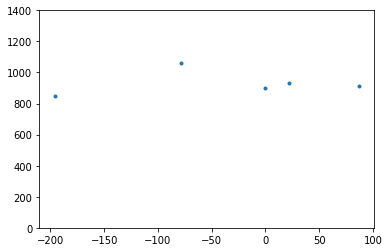

In [84]:
plt.plot(temperatures, variances, '.')
plt.ylim(0,1400)

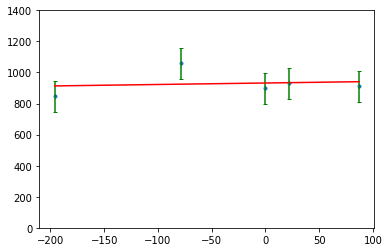

In [96]:
def f(x, a, b):
    return a*x + b

from scipy.optimize import curve_fit
p_opt, p_cov = curve_fit(f, temperatures, variances, (0, 0), np.array((100, 100, 100, 100 ,100)), True)
output = f(temperatures, p_opt[0], p_opt[1])
plt.plot(temperatures, variances, '.')
plt.plot(temperatures, output, 'r-')
plt.errorbar(temperatures, variances, yerr=100, xerr=0, linestyle='none', ecolor='g', capsize=2)
plt.ylim(0,1400)
plt.show()